<a href="https://colab.research.google.com/github/Evan-Barry/FYP_GAN_Prototype/blob/main/Brick_With_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!pip install Pillow

**Imports**

In [76]:
# Imports

import numpy as np
from numpy import random
from numpy import asarray
from matplotlib import pyplot as plt
%matplotlib inline
from PIL import Image
from google.colab.patches import cv2_imshow
from IPython.display import Image as img
import cv2

**Plotting Function**

In [63]:
# Drawing function

def view_samples(samples, m, n):
    fig, axes = plt.subplots(figsize=(10, 10), nrows=m, ncols=n, sharey=True, sharex=True)
    for ax, img in zip(axes.flatten(), samples):
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        im = ax.imshow(1-img.reshape((256,256)), cmap='Greys_r')  
    return fig, axes

**Convert images to greyscale**

In [77]:
image1 = Image.open("/content/drive/MyDrive/Colab Notebooks/Real_Images/Bricks/brick1.png").convert('LA')
image1.save("/content/drive/MyDrive/Colab Notebooks/Real_Images/Bricks/brick1_greyscale.png")
image2 = Image.open("/content/drive/MyDrive/Colab Notebooks/Real_Images/Bricks/brick2.png").convert('LA')
image2.save("/content/drive/MyDrive/Colab Notebooks/Real_Images/Bricks/brick2_greyscale.png")
image3 = Image.open("/content/drive/MyDrive/Colab Notebooks/Real_Images/Bricks/brick3.png").convert('LA')
image4.save("/content/drive/MyDrive/Colab Notebooks/Real_Images/Bricks/brick3_greyscale.png")
image4 = Image.open("/content/drive/MyDrive/Colab Notebooks/Real_Images/Bricks/brick4.png").convert('LA')
image4.save("/content/drive/MyDrive/Colab Notebooks/Real_Images/Bricks/brick4_greyscale.png")

**Convert greyscale to binary**

In [103]:
image1_greyscale = cv2.imread("/content/drive/MyDrive/Colab Notebooks/Real_Images/Bricks/brick4_greyscale.png", 0)
retval, image1_binary1 = cv2.threshold(image1_greyscale, 127, 255, cv2.THRESH_BINARY)
retval, image1_binary2 = cv2.threshold(image1_greyscale, 127, 255, cv2.THRESH_BINARY_INV)
retval, image1_binary3 = cv2.threshold(image1_greyscale, 127, 255, cv2.THRESH_TRUNC)
retval, image1_binary4 = cv2.threshold(image1_greyscale, 127, 255, cv2.THRESH_TOZERO)
retval, image1_binary5 = cv2.threshold(image1_greyscale, 127, 255, cv2.THRESH_TOZERO_INV)

**Different versions of binary threholds**

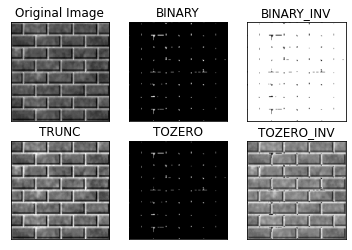

In [104]:
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [image1_greyscale, image1_binary1, image1_binary2, image1_binary3, image1_binary4, image1_binary5]

for i in range(6):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])

plt.show()

**Convert rest of images to binary with threshold of choice**
I choose THRESH_TRUNK as it looks most like the original for all examples


In [108]:
image1_greyscale = cv2.imread("/content/drive/MyDrive/Colab Notebooks/Real_Images/Bricks/brick1_greyscale.png", 0)
image2_greyscale = cv2.imread("/content/drive/MyDrive/Colab Notebooks/Real_Images/Bricks/brick2_greyscale.png", 0)
image3_greyscale = cv2.imread("/content/drive/MyDrive/Colab Notebooks/Real_Images/Bricks/brick3_greyscale.png", 0)
image4_greyscale = cv2.imread("/content/drive/MyDrive/Colab Notebooks/Real_Images/Bricks/brick4_greyscale.png", 0)

retval, image1_binary = cv2.threshold(image1_greyscale, 127, 255, cv2.THRESH_TRUNC)
retval, image2_binary = cv2.threshold(image2_greyscale, 127, 255, cv2.THRESH_TRUNC)
retval, image3_binary = cv2.threshold(image3_greyscale, 127, 255, cv2.THRESH_TRUNC)
retval, image4_binary = cv2.threshold(image4_greyscale, 127, 255, cv2.THRESH_TRUNC)

**Examples of Bricks**

(65536,)


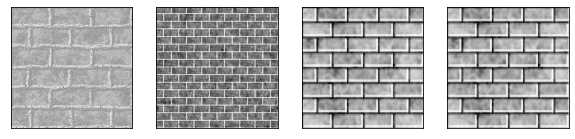

In [159]:
# Examples of bricks
#img1 = Image.open("/content/drive/MyDrive/Colab Notebooks/Real_Images/Bricks/image1_greyscale.png")
img1_numpydata = asarray(image1_binary).flatten()
#img2 = Image.open("/content/drive/MyDrive/Colab Notebooks/Real_Images/Bricks/image2_greyscale.png")
img2_numpydata = asarray(image2_binary).flatten()
#img3 = Image.open("/content/drive/MyDrive/Colab Notebooks/Real_Images/Bricks/image3_greyscale.png")
img3_numpydata = asarray(image3_binary).flatten()
#img4 = Image.open("/content/drive/MyDrive/Colab Notebooks/Real_Images/Bricks/image4_greyscale.png")
img4_numpydata = asarray(image4_binary).flatten()
print(img4_numpydata.shape)
#print(img4_numpydata.flatten().shape)

bricks = [img1_numpydata,
          img2_numpydata,
          img3_numpydata,
          img4_numpydata]

_ = view_samples(bricks, 1, 4)

**Examples of Noise**

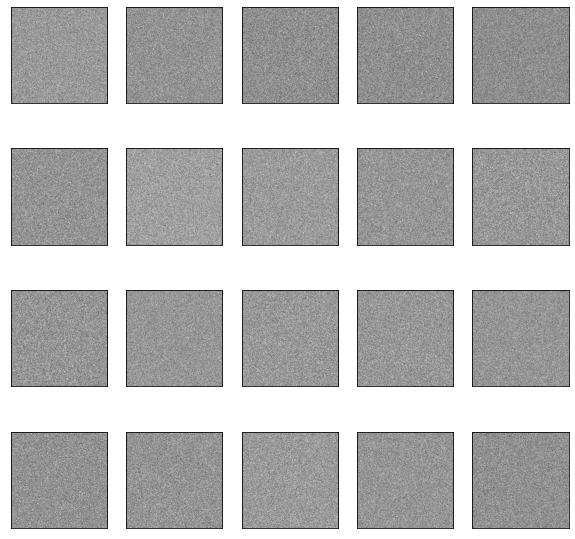

In [160]:
# Examples of noisy images
noise = [np.random.randn(256,256) for i in range(20)]
def generate_random_image():
    return [np.random.random(), np.random.random(), np.random.random(), np.random.random()]

_ = view_samples(noise, 4,5)

**Building the Neural Networks

In [161]:
# The sigmoid activation function
def sigmoid(x):
  return np.exp(x)/(1.0+np.exp(x))

**The Discriminator**

In [170]:
class Discriminator():
  def __init__(self):
    self.weights = np.array([np.random.normal() for i in range(65536)], dtype=np.float128)
    self.bias = np.random.normal()

  def forward(self, x):
    return sigmoid(np.dot(x, self.weights) + self.bias)

  def error_from_image(self, image):
    prediction = self.forward(image)
    return -np.log(prediction)

  def derivative_from_image(self, image):
    prediction = self.forward(image)
    derivatives_weights = -image * (1-prediction)
    derivatives_bias = -(1-prediction)
    return derivatives_weights, derivatives_bias

  def update_from_image(self, x):
    ders = self.derivative_from_image(x)
    self.weights -= learning_rate * ders[0]
    self.bias -= learning_rate * ders[1]

  def error_from_noise(self, noise):
    prediction = self.forward(noise)
    return -np.log(1-prediction)

  def derivative_from_noise(self, noise):
    prediction = self.forward(noise)
    derivatives_weights = noise * prediction
    derivatives_bias = prediction
    return derivatives_weights, derivatives_bias

  def update_from_noise(self, noise):
    ders = self.derivative_from_noise(noise)
    self.weights -= learning_rate * ders[0]
    self.bias -= learning_rate * ders[1]

**The Generator**

In [171]:
class Generator():
  def __init__(self):
    self.weights = np.array([np.random.normal() for i in range(65536)], dtype=np.float128)
    self.biases = np.array([np.random.normal() for i in range(65536)], dtype=np.float128)

  def forward(self, z):
    return sigmoid(z * self.weights + self.biases)

  def error(self, z, discriminator):
    x = self.forward(z)
    y = discriminator.forward(x)
    return -np.log(y)

  def derivatives(self, z, discriminator):
    discriminator_weights = discriminator.weights
    discriminator_bias = discriminator.bias
    x = self.forward(z)
    y = discriminator.forward(x)
    factor = -(1-y) * discriminator_weights * x * (1-x)
    derivative_weights = factor * z
    derivative_bias = factor
    return derivative_weights, derivative_bias

  def update(self, z, discriminator):
    error_before = self.error(z, discriminator)
    ders = self.derivatives(z, discriminator)
    self.weights -= learning_rate * ders[0]
    self.biases -= learning_rate * ders[1]
    error_after = self.error(z, discriminator)

**Training**

In [172]:
# Set Random Seed
np.random.seed(42)

learning_rate = 0.01
epochs = 10

# The GAN
D = Discriminator()
G = Generator()

errors_discriminator = []
errors_generator = []

for epoch in range(epochs):
  for brick in bricks:
    D.update_from_image(brick)

    z = random.rand()

    errors_discriminator.append(sum(D.error_from_image(brick) + D.error_from_noise(z)))

    errors_generator.append(G.error(z, D))

    noise = G.forward(z)

    D.update_from_noise(noise)

    G.update(z,D)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in longdouble_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


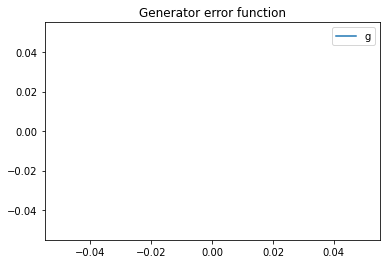

Text(0.5, 1.0, 'Discriminaotr error function')

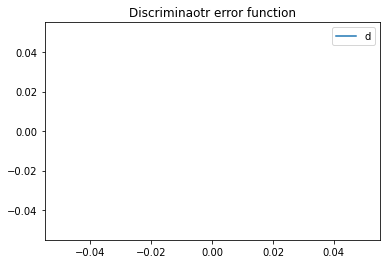

In [165]:
import matplotlib.pyplot as plt
plt.plot(errors_generator)
plt.title("Generator error function")
plt.legend("gen")
plt.show()
plt.plot(errors_discriminator)
plt.legend('disc')
plt.title("Discriminaotr error function")

**Generated Images**

[nan nan nan ... nan nan nan]
[nan nan nan ... nan nan nan]
[nan nan nan ... nan nan nan]
[nan nan nan ... nan nan nan]


/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:452: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:459: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:464: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


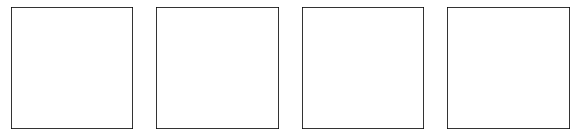

In [166]:
generated_images = []
for i in range(4):
  z = random.random()
  generated_image = G.forward(z)
  generated_images.append(generated_image)
_ = view_samples(generated_images, 1, 4)
for i in generated_images:
  print(i)

**Studying the weights and biases of the Generator and Discriminator**

In [167]:
print("Generator Weights" , G.weights)
print("Generator Biases" , G.biases)

Generator Weights [nan nan nan ... nan nan nan]
Generator Biases [nan nan nan ... nan nan nan]


In [ ]:
print("Discriminator Weights" , D.weights)
print("Discriminator Biases" , D.bias)

Discriminator Weights [-2.91370004 -2.5726346  -0.54231362 -0.63403655 -2.74282854 -2.78376483
 -2.52078317  1.35447915  0.45144938 -2.55247718 -2.57194078 -2.58979836
 -0.01565281  1.20753695 -2.59876773 -2.8196961  -2.66548231 -0.00858314
 -0.36990611 -2.61016531  0.92606112  0.69270416  0.39418233  0.51105038
  0.68128866  0.38769648  0.364496    0.38681888  0.45090891  0.59286658
 -2.53349094 -3.00282815 -2.63858949  0.49504621 -0.07682385 -2.62085032
 -2.77291891 -2.88590553  0.39137705 -0.87797594 -2.74588165 -2.64277734
 -2.52577126 -1.17282465  1.16423283 -3.1265984  -2.65790048 -2.82870004
 -1.28877537 -0.20181774  0.64842515  0.61770568  0.58428604  0.50705966
  0.37733995  0.20386464  0.56231768  0.38925086  0.53904948  0.56140052
 -2.49470536 -0.34466443 -2.54236902  1.59550411 -2.97703738 -2.73642655
  0.11395156 -2.62384101 -1.19405892 -2.96919013 -3.2072768  -0.53738383
 -2.50958391 -0.37295815 -3.37061535 -2.46497409  1.14231474 -2.79499797
  0.0243718  -2.799172    0.2